Миссия Кеплера запущенная 6 марта 2009 года, была первой космической миссией, посвященной поиску планет в нашем районе галактики. Кеплер охотился за чужими мирами используя транзитный метод, то есть обнаруживая провалы в яркости звезды, возникающие, когда планета пересекает ее диск. Разумеется, при этом все три объекта должны находиться на одной прямой, что, конечно, сильно снижает количество обнаруживаемых планет. В поле его зрения находилось 4,5 миллиона звезд, из которых он почти непрерывно наблюдал 170 000, фиксируя изменения в их свечении.Участок неба, за которым следил Кеплер это созвездия: Лебедь, Лира, Орёл. 15 ноября 2018 года «Кеплер» прекратил свою работу так как топлива для возврата на орбиту не хватало. В эту дату умер Иоганн Кеплер. 

Несмотря на то, что Кеплер больше не будет поставлять новые данные, изучение и уточнение старых займет еще много лет.  



### Цель работы:

В работе проанализированы данные телескопа Кеплер которые собраны почти за 4 года его работы на орбите. В данный момент времени робота телескопа прекращена. 
- найти звезды похожие на Солнце
- найти планеты схожие по размерам с Землей
- найти планеты, которые лежат в зоне обитаемости своих звезд


_Данные скачаны в мае 2021 года, база постоянно обновляется. Метод транзитов обычно используют вместе с методом Доплера, помогающего также оценить массу исследуемой планеты, ее плотность и физическую структуру. Поэтому невозможно вычислить массу планет и оценить силу тяжести чтобы сравнить их с Земными параметрами_


[Данные взяты с этого сайта](https://exoplanetarchive.ipac.caltech.edu/)

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import math

In [160]:
plt.rcParams['figure.figsize'] = [15.0, 7.0]  # установка размера всех фигур по умолчанию, если не указано иного 
plt.rcParams['axes.titlesize'] = 16           # размер заголовков 
plt.rcParams['ytick.labelsize'] = 10          # размер тиков оси ОУ
plt.rcParams['axes.labelsize'] = 14           # размер названия оси ОУ
plt.rcParams['figure.facecolor'] = 'white'    # фон графиков

 ### НАЗВАНИЯ СТОЛБЦОВ


   -   kepid:   KepID
   -   kepoi_name:     KOI Name
   -   kepler_name:    Kepler Name
   -   koi_disposition: Exoplanet Archive Disposition
   -   koi_pdisposition: Disposition Using Kepler Data
   -   koi_score:      Disposition Score
   -   koi_fpflag_nt:  Not Transit-Like False Positive Flag
   -   koi_fpflag_ss:  Stellar Eclipse False Positive Flag
   -   koi_fpflag_co:  Centroid Offset False Positive Flag
   -   koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag
   -   koi_period:     Orbital Period [days]
   -   koi_time0bk:    Transit Epoch [BKJD]
   -   koi_impact:     Impact Parameter
   -   koi_duration:   Transit Duration [hrs]
   -   koi_depth:      Transit Depth [ppm]
   -   koi_prad:       Planetary Radius [Earth radii]
   -   koi_teq:        Equilibrium Temperature [K]
   -   koi_insol:      Insolation Flux [Earth flux]
   -   koi_model_snr:  Transit Signal-to-Noise
   -   koi_tce_plnt_num: TCE Planet Number
   -   koi_tce_delivname: TCE Delivery
   -   koi_steff:      Stellar Effective Temperature [K]
   -   koi_slogg:      Stellar Surface Gravity [$\lg cm/s^{2}$]
   -   koi_srad:       Stellar Radius [Solar radii]
   -   ra:             RA [decimal degrees]
   -   dec:            Dec [decimal degrees]
   -   koi_kepmag:     Kepler-band [mag]


### Пояснения для некоторых столбцов и тех,  которые будут использоваться 
- **kepoi_name** - имя состоит из целого числа и десятичной части формата KNNNNN.DD. Целая часть обозначает целевую звезду, двузначная десятичная часть идентифицирует уникальный транзитный объект, связанный с этой звездой
- **kepler_name** - предназначены для четкого обозначения класса объектов, которые были подтверждены 
- **koi_pdisposition** - наиболее вероятная категория, к которой отнесен объект  (CONFIRMED – подтвержденный, CANDIDATE – кандидат, FALSE POSITIVE – ложно-позитивный)
- **koi_score** - значение от 0 до 1, которое указывает точность. Для кандидатов более высокое значение указывает на большую уверенность в его статусе, в то время как для ложно-положительного более высокого значения указывает на меньшее доверие к его статусу
- **koi_period** - обращение вокруг материнской звезды (земные дни)
- **koi_impact** - расстояние в проекции неба между центром звездного диска и центром планетарного диска в точке соединения (безразмерная величина)
![](impact.png)
- **koi_duration** - продолжительность наблюдаемых транзитов. Продолжительность измеряется от первого контакта между планетой и звездой до последнего контакта (земные часы)
- **koi_depth** - глубина прохождения - это отношение площади поверхности диска звезды, заблокированной диском планеты. Таким образом, глубина транзита - это квадрат радиуса планеты, деленный на радиус звезды. Относительные размеры звезды и планеты (части на миллион)
- **koi_prad** - радиус планеты. Планетарный радиус является произведением отношения радиуса звезды планеты к радиусу звезды (радиусы Земли)
- **koi_teq** - равновесная температура рассчитывается исключительно из баланса с падающей звездной энергией на планету (Кельвины)
- **koi_insol** - поток солнечной радиации на поверхность (относительно Земного)
-  **koi_model_snr** -  отношение мощности полезного сигнала к мощности шума. Чем больше это отношение, тем меньше шум влияет на характеристики системы (безразмерная величина)
- **koi_tce_plnt_num** - номер планеты в каталоге
- **koi_tce_delivname** - название планеты в каталоге

Параметры звезд:
- **koi_steff** - звездная эффективная температура (Кельвины) (температура Солнца 5780, Земли 249, Марса 213)
- **koi_slogg** - звездная поверхностная гравитация ($\lg cm/s^{2}$) (гравитация Солнца 2.922, система измерения СГС)
- **koi_srad** - звездный радиус (Солнечные радиусы)


In [161]:
df = pd.read_csv('data_exoplanet.csv', sep=',', comment='#')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [163]:
# проверим на дубликаты
df_1 = df.drop_duplicates()
print(df_1.shape)
print(df.shape)
# дубликатов нет

(9564, 49)
(9564, 49)


In [164]:
# удалим все столбцы где записаны погрешности измерений (err) 
df.drop([col for col in df.columns if 'err' in col], axis=1, inplace=True)

# удалим cтолбцы с метками из других каталогов и не несущих полезной информации 
df.drop(['koi_tce_plnt_num','koi_tce_delivname', 'ra', 'dec', 'koi_kepmag', 'kepid'], axis = 1, inplace=True)

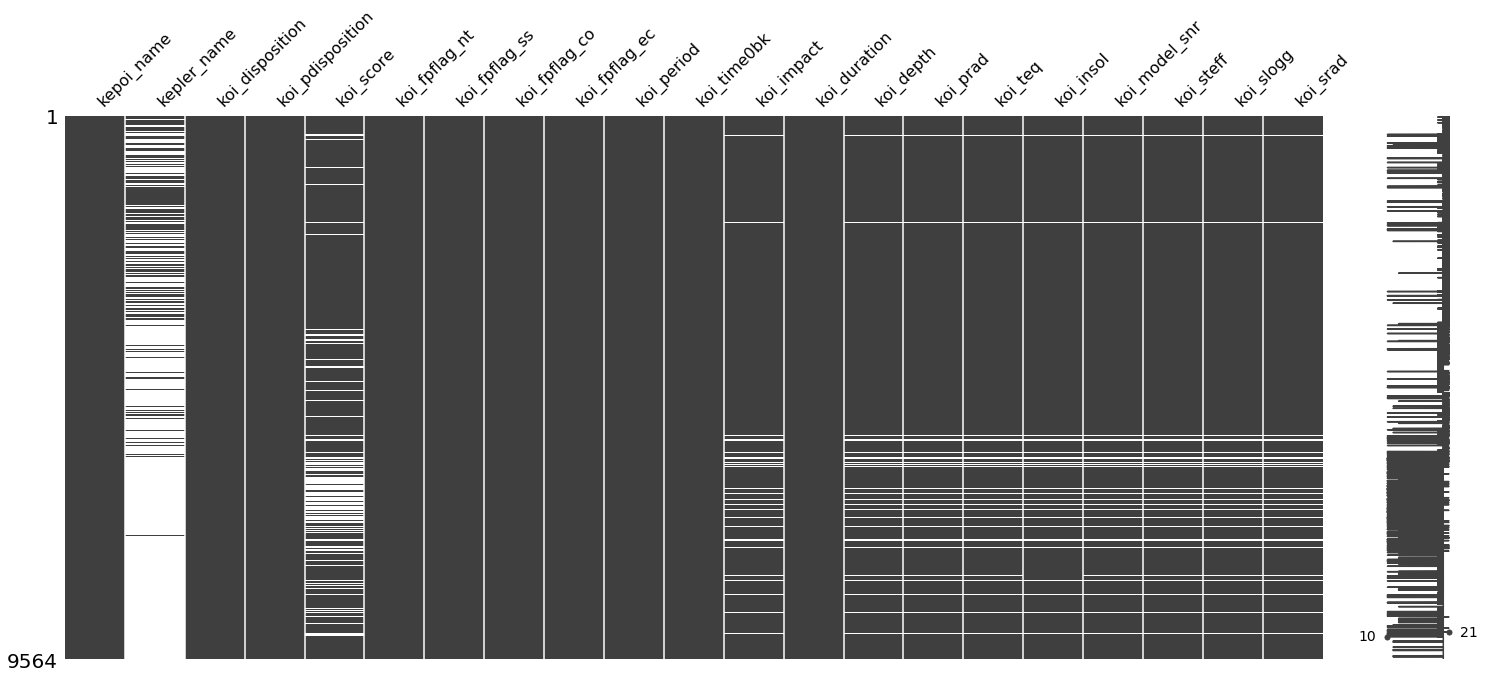

In [165]:
# посмотрим на количество пропущенных данных
msno.matrix(df)

In [166]:
# уберем лишние символы в названии колонок c одним исключением kepler_name иначе названия колонок задублируются
col_name = []

for col in df.columns.to_list():
    if col.find('kepler') == False:
        col_name.append(col)
    else:
        col_name.append(col.rpartition('_')[2])

df.columns = col_name
df.head()

,name,kepler_name,disposition,pdisposition,score,nt,ss,co,ec,period,...,impact,duration,depth,prad,teq,insol,snr,steff,slogg,srad
0,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,...,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927
1,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,...,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927
2,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,...,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868
3,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,...,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791
4,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,...,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046


## Часть 1. Звезды
### Рассмотрим сначала звезды, может среди них есть похожие на Солнце?

Звездные параметры в таблице:
- **steff** - эффективная температура звезды, Кельвины (температура Солнца 5780 К, Земли 249 К, Марса 213 К)
- **slogg** -  поверхностная гравитация звезды, $\lg cm/s^{2}$ (гравитация Солнца 2.922 $\lg cm/s^{2}$, система измерения СГС)
- **srad** - радиус звезды, Cолнечные радиусы

In [126]:
# отберем столбцы с параметрами звезд
stars = df[['steff', 'slogg', 'srad']]

Посмотрим на температуры звезд, а линией отметим температуру нашего Солнца. Предварительно логарифмируем данные температуры.

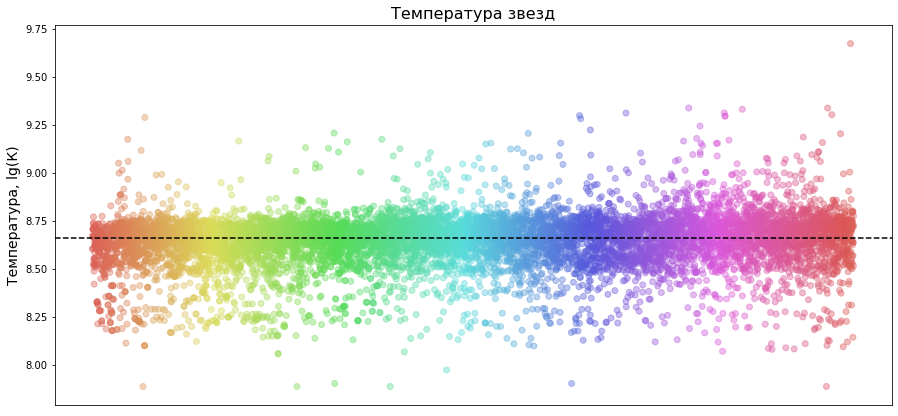

In [158]:
temp = stars['steff']
x = temp.index
y = np.log(temp.values)
N = len(temp)
colors = sns.color_palette('hls', N)

plt.scatter(x, y, c=colors, alpha=0.4)
plt.title('Температура звезд')
plt.ylabel('Температура, lg(К)')
plt.xticks([])
plt.axhline(y=np.log(5780), c='k', linewidth=1.5, linestyle='--');
# эффективная температура нашего Солнца 5780 К

Оценим радиусы звезд, где значение 1 это радиус звезды равный Cолнечному.
Размер круга - пропорционален количеству радиусов Cолнца (r Cолнца 696 000 км).

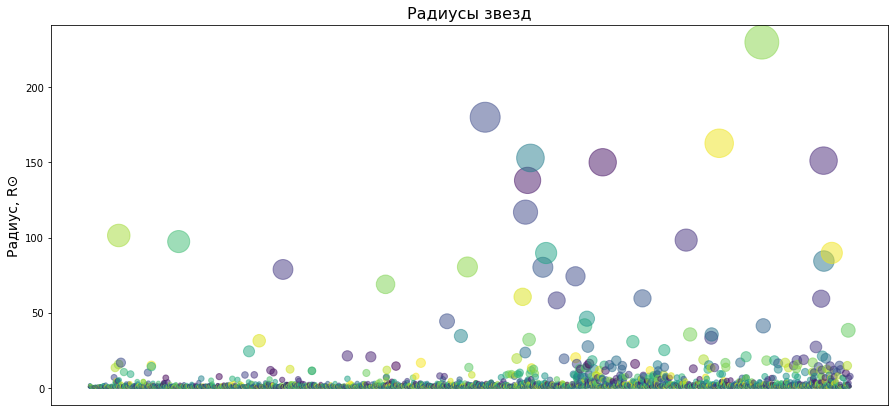

In [157]:
rad = stars['srad']
x = rad.index
y = rad.values
N = len(rad)
colors = np.random.rand(N)

plt.scatter(x, y, c=colors, alpha=0.5, s=y*5)
plt.xticks([])
plt.title('Радиусы звезд')
plt.ylabel('Радиус, R⊙');  # R⊙ - измерения в радиусах Солнца

Поверхностная гравитация звезд.
Размер точки зависит от значения slogg (гравитация Cолнца 2.922) 

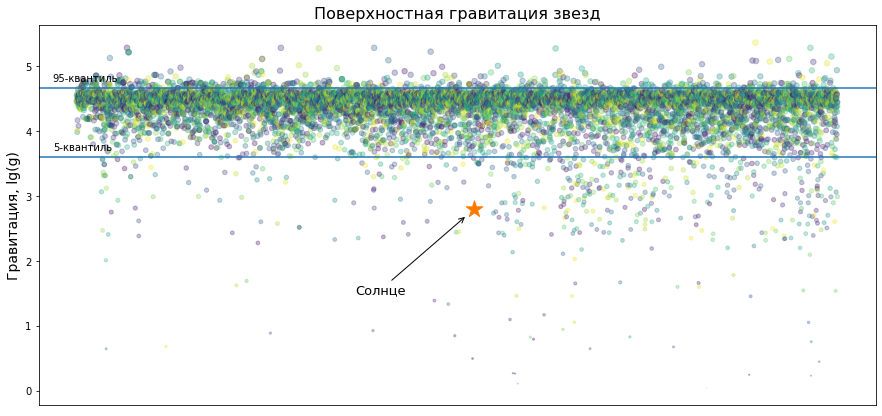

In [167]:
grav = stars['slogg']
x = grav.index
y = grav.values
colors = np.random.rand(len(grav))
q95 = grav.quantile(0.95)  # 95 квантиль
q5 = grav.quantile(0.05)   # 5  квантиль

plt.scatter(x, y, c=colors, s=6*y, alpha=0.3)
plt.axhline(y=q95)
plt.axhline(y=q5)
plt.title('Поверхностная гравитация звезд')
plt.ylabel('Гравитация, lg(g)')
plt.annotate('Солнце', xy=(4900, 2.7), fontsize=13,
             xytext=(3500, 1.5), arrowprops=dict(facecolor='#FF6E40', arrowstyle='->'))
plt.annotate('95-квантиль', xy=(-300, q95+0.1), fontsize=10)
plt.annotate('5-квантиль', xy=(-300, q5+0.1), fontsize=10)
plt.scatter(x=5000, y=2.8, marker="*", s=300, c='#FF7A00')
plt.xticks([]);

Все звезды в зависимости от их температуры делятся на классы. Эти классы характеризуют цвет света, который звезды излучают, цвет звезды зависит от ее температуры.

_(Именно на цвете света основан тот самый спектральный анализ!)_ 

#### Определим спектральные классы звезд 

Умные мужи в Гарварде определили следующий порядок.

![](star.png)

In [130]:
def star(x):
    if 2500 <= x < 3500:
        return 'M'
    if 3500 <= x < 5000:
        return 'K'
    if 5000 <= x < 6000:
        return 'G'
    if 6000 <= x < 7400:
        return 'F'
    if 7400 <= x < 10000:
        return 'A'
    if 10000 <= x < 25000:
        return 'B'
    if x > 25000:
        return 'O'


# сделаем новый столбец
df['star_class'] = df.loc[:, 'steff'].apply(star)

# посчитаем кaкие классы у нас есть
percent = (df.groupby('star_class').size()/len(df) * 100).sort_values(ascending=False)

На основе таблицы расставим классы звезд. (Солнце имеет класс К). Цвета баров отражают то какой цвет света излучают звезды

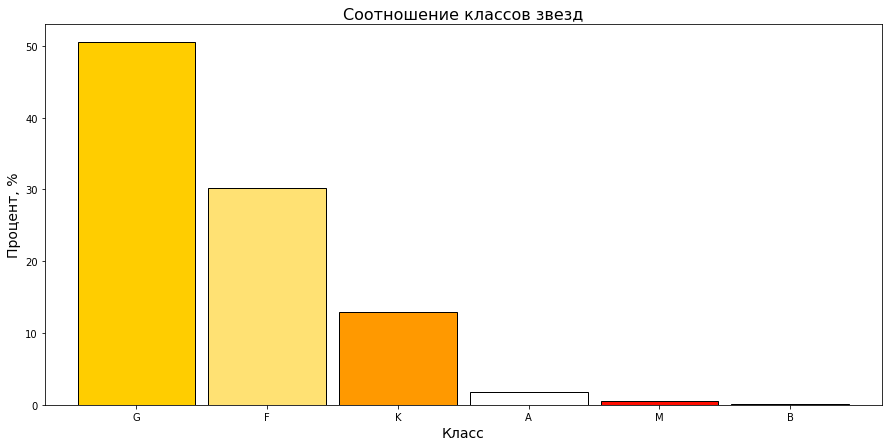

In [168]:
percent.plot(kind='bar', color=['#FFCD00', '#FFE173', '#FF9900',
                                'w', '#FF0D00', '#66A1D5'], width=0.9, edgecolor='black')
plt.title('Соотношение классов звезд')
plt.xlabel('Класс')
plt.ylabel('Процент, %')
plt.xticks(rotation=0);

Так же рассчитаем еще одну важную характеристику звезд это - радиус зоны обитаемости. Это условная область в космосе, определённая из расчёта, что условия на поверхности находящихся в ней планет будут близки к условиям на Земле и будут обеспечивать существование воды в жидкой фазе.  Но для этого сначала потребуется рассчитать светимость звезды.

Приближённо рассчитать светимость звезды можно по формуле: 
$$L = 4\pi R^{2} \cdot\sigma T^{4}$$

 Где:
- $R$ — радиус звезды, м (радиус солнца 695 700 000 м)
- $T$ — температура её фотосферы, К
- $\sigma$ — постоянная Стефана — Больцмана (0.00000005670367) 

In [169]:
# посчитаем отдельно константу (4*pi*sigma)
const = 4 * math.pi * 0.00000005670367

# посчитаем светимость Солнца
L_sun = const * 695700000**2 * 5780**4

# и добавим столбец в дф
df['luminosity'] = const * (df['srad'] * 695700000)**2 * df['steff']**4

Центр обитаемой зоны для конкретной звезды описывается уравнением:
$$d_{АU} = \sqrt{L_{star}  \big/ L_{sun}}$$

Где:
- ${\displaystyle d_{AU}}$ — средний радиус обитаемой зоны,  в AE (астрономическая единица (среднее расстояние от Земли до Солнца) считается равной в точности 149 597 870 700 метрам)
- ${\displaystyle L_{star}}$ — болометрический показатель (светимость) звезды
- ${\displaystyle L_{sun}}$ — болометрический показатель (светимость) Солнца

Рассчитаем средний радиус обитаемой зоны у каждой звезды и построим график.

In [170]:
df['d_au'] = df['luminosity'].apply(
    lambda x: np.nan if x != x else math.sqrt(x / L_sun))

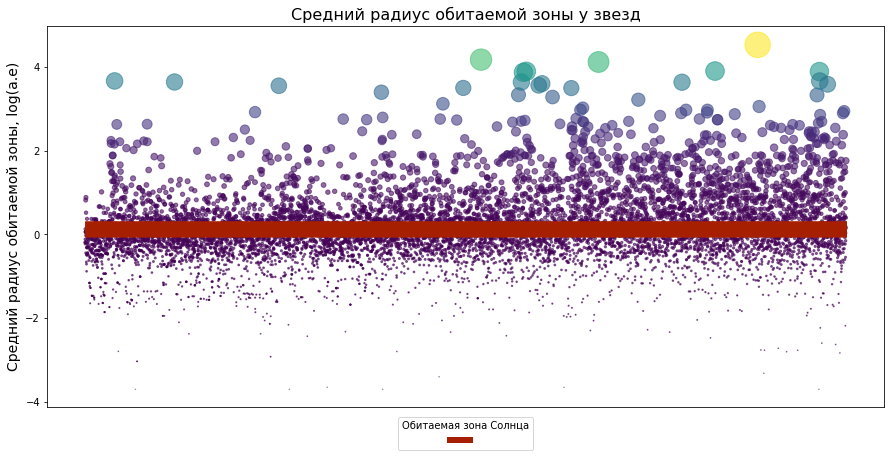

In [171]:
# предварительно логарифмируем данные по y
d = df['d_au']
N = len(d)
x = d.index
y = d.values

plt.scatter(x, np.log(y), s=y*7, c=y, alpha=0.6)
plt.fill_between(x, np.log(0.95), np.log(1.37), color='#A62000') # нижняя и верхняя граница обитаемой зоны Солнца 
plt.axhline(y=np.log(1), label=' ', c='#A62000', xmin=2, xmax=3, linewidth=6)
plt.title('Средний радиус обитаемой зоны у звезд')
plt.xticks([])
plt.ylabel('Средний радиус обитаемой зоны, log(a.e)')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.07), title='Обитаемая зона Cолнца');

**Получаем:**
- по размеру Солнце не выделяется на фоне остальных 
- Солнце относится к третьему по частоте встречаемости классу звезд, (класс К)
- зона обитаемости Солнца не такая уж и уникальная 

Единственное значительное отличие:
- поверхностная гравитация Солнца ниже границы 5-ти процентного квантиля

#### Вывод: Солнце по большинству основных параметров довольно посредственная звездулька, кроме показателя поверхностной гравитации

Найти абсолютного близнеца нашему Солнцу такая себе идея, поэтому чуть "расширим" границы поиска по основным параметрам на 15%

In [172]:
# дф с параметрами нашей родной звезды
sun = pd.DataFrame({'Параметры': ['steff', 'srad', 'slogg', 'd_ae'],
                    'Значения': [5780, 1, 2.922, 1]})
sun

,Параметры,Значения
0,steff,5780.000
1,srad,1.000
2,slogg,2.922
3,d_ae,1.000


Рассчитаем верхние и нижние границы параметров Солнца (+- 15%)

In [173]:
for x, y in zip(sun.iloc[:, 1], sun.iloc[:, 0]):
    mi = x*(1-15/100)
    ma = x*(1+15/100)
    print(f'max ={str(round(ma, 2)).rjust(10)} min ={str(round(mi, 2)).rjust(10)}, parameter = {y}')

max =    6647.0 min =    4913.0, parameter = steff
max =      1.15 min =      0.85, parameter = srad
max =      3.36 min =      2.48, parameter = slogg
max =      1.15 min =      0.85, parameter = d_ae


Отберем записи по полученным границам

In [174]:
like_sun = df[((df['steff'] < 6645) & (df['steff'] > 4913)) &
              ((df['srad'] < 1.15) & (df['srad'] > 0.85)) &
              ((df['slogg'] < 3.36) & (df['slogg'] > 2.484)) &
              ((df['d_au'] < 1.15) & (df['d_au'] > 0.85))]

len(like_sun)

0

#### Итог: К сожалению, звезды похожей на наше Солнце, даже с допущением, найти не удалось(

Но к счастью, для нахождения той планеты, которая может быть названа Землей-2.0 совсем не обязательно что бы звезда была в точности похожа на Солнце, а планета была копией Земли.  Поэтому рассчитаем несколько параметров для нахождения такой пары «планета-звезда», что бы условия на планете из-за ее расположения относительно звезды были похожими на Земные.  

## Часть 2. Планеты и Зона обитаемости

### Попробуем найти планеты, которые лежат в зоне обитаемости имеющихся звезд.

У нас уже рассчитан радиус зоны обитаемости для каждой звезды  ${\displaystyle d_{AU}}$. Осталось рассчитать расстояние от кандидатов в планеты до их материнских звезд.

Для начала посмотрим, сколько у каждой звезды планет. Для этого отберем кандидатов в планеты убрав некоторые ненужные столбцы.

In [175]:
data = df[df['pdisposition'] == 'CANDIDATE'].drop(
    columns={'nt', 'ss', 'co', 'ec', 'luminosity', 'srad'})

In [176]:
# проверим на дубликаты названий
name = data['name'].drop_duplicates()
len(data['name']) - len(name)

0

In [177]:
# подсчет количества планет у одной звезды 
amount_planets = pd.Series([int(i.split('.')[1]) for i in name]) \
                            .value_counts().reset_index().rename(columns={0:"amount"})
amount_planets

,index,amount
0,1,3568
1,2,767
2,3,260
3,4,91
4,5,25
5,6,4
6,7,2


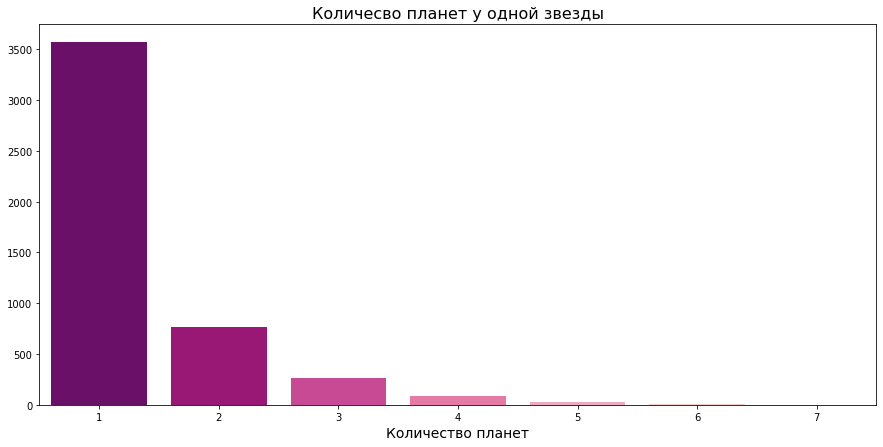

In [178]:
# визуализируем 
sns.barplot(x='index', y='amount', data=amount_planets, palette = 'RdPu_r')
plt.title('Количесво планет у одной звезды')
plt.xlabel('Количество планет')
plt.ylabel('');
# не густо!

Определим расстояние от планеты до ее звезды. Для этого воспользуемся третьим законом Кеплера:  сейчас будет сложно


**Квадраты периодов обращения планет вокруг солнца относятся, как кубы больших полуосей орбит планет**

_(Ньютон позже уточнил формулу с учетом массы солнца и планеты)_



$$\frac{T_1^2 (M+m_{1})}{T_2^2 (M+m_{2})}  = \frac{a_1^3}{a_2^3}$$



Где:
- $T_{1}$ и $T_{2}$  - периоды обращения двух планет вокруг солнца, в земных годах
- $M$ - масса солнца
- $m_{1}$ и $m_{2}$ - масса планет
- $a_{1}$ и $a_{2}$ - длины больших полуосей их орбит

[Доказательство можно посмотреть тут](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD%D1%8B_%D0%9A%D0%B5%D0%BF%D0%BB%D0%B5%D1%80%D0%B0)


Из этого закона следует, что среднее расстояние ($r$) от планеты до ее солнца (в долях а.е.) можно найти через  период ее обращения ($T$) по формуле:

$$r = \sqrt[3]{T^{2} (1+\frac{m_{пл}}{m_{c}})}\approx \sqrt[3]{T^{2}}$$
Массой планеты ($m_{пл}$) по сравнению с массой Солнца ($m_{c}$) можно пренебречь, так как масса планеты всегда значительно ниже массы Солнца

Вычислим дистанцию от планеты до ее звезды и построим график.

In [179]:
data['distance'] = np.cbrt(((data['period'] / 365)**2))
data.head()

,name,kepler_name,disposition,pdisposition,score,period,time0bk,impact,duration,depth,prad,teq,insol,snr,steff,slogg,d_au,distance
0,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,9.488036,170.538750,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.825683,0.087752
1,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,54.418383,162.513840,0.586,4.5070,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.825683,0.281170
2,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,19.899140,175.850252,0.969,1.7822,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.890064,0.143779
4,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,2.525592,171.595550,0.701,1.6545,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.138819,0.036312
5,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,11.094321,171.201160,0.538,4.5945,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,1.063523,0.097395


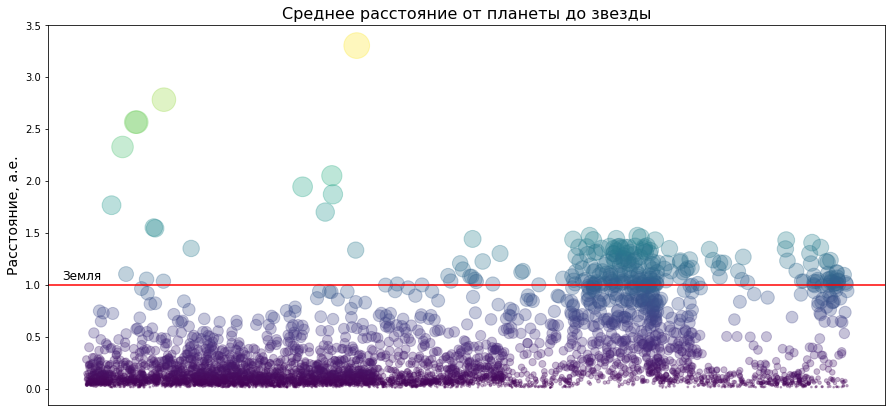

In [180]:
# отберем записи без одного экстремального значения 50 а.е.
dist = data[data['distance'] < 4]['distance']
x = dist.index
y = dist.values
N = len(dist)
colors = sns.color_palette("flare", N)

plt.scatter(x, y, c=y, alpha=0.3, s=y*200)
plt.title('Среднее расстояние от планеты до звезды')
plt.ylabel('Расстояние, а.е.')
plt.annotate('Земля', xy=(-300, 1.05), fontsize=12)
plt.axhline(y=1, color='r')
plt.xticks([]);

Данные о планетах:
- **period** - обращение вокруг материнской звезды (земные дни)
- **impact** - расстояние в проекции неба между центром звездного диска и центром планетарного диска в точке соединения 
![](impact.png)
- **duration** - продолжительность наблюдаемых транзитов. Продолжительность измеряется от первого контакта между планетой и звездой до последнего контакта (земные часы)
- **depth** - глубина прохождения - это отношение площади поверхности диска звезды, заблокированной диском планеты. Таким образом, глубина транзита - это квадрат радиуса планеты, деленный на радиус звезды. Относительные размеры звезды и планеты (части на миллион)
- **prad** - радиус планеты. Планетарный радиус является произведением отношения радиуса звезды планеты к радиусу звезды (радиусы Земли)
- **teq** - равновесная температура рассчитывается исключительно из баланса с падающей звездной энергией на планету (Кельвины)
- **insol** - поток солнечной радиации на поверхность (относительно Земного)

Метод транзитов обычно используют вместе с методом Доплера, помогающего также оценить и массу исследуемой планеты, ее плотность и
физическую структуру. Поэтому найти гравитацию планет, мы, к сожалению, не сможем.

Визуализируем радиусы планет.

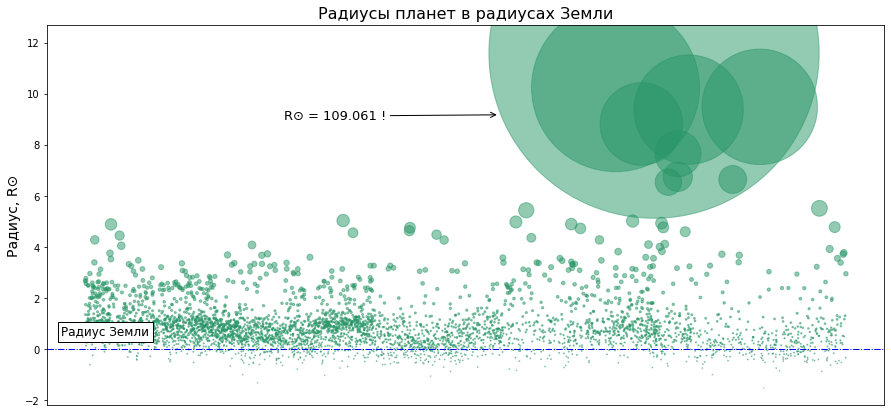

In [181]:
rad = data['prad'].sort_values(ascending=False)
x = rad.index
y = rad.values
bbox_properties = dict(boxstyle='square', fc='w')

plt.scatter(x, np.log(y), s=y, alpha=0.5, c='#289667')
plt.axhline(y=np.log(1), color='b', lw=1, ls='-.')
plt.title('Радиусы планет в радиусах Земли')
plt.ylabel('Радиус, R⊙')
plt.annotate('R⊙ = 109.061 !', xy=(5200, 9.185), fontsize=13,
             xytext=(2500, 9), arrowprops=dict(facecolor='#FF6E40', arrowstyle='->'))
plt.text(-300, np.log(1.7), 'Радиус Земли', fontsize=12, bbox=bbox_properties)
plt.xticks([]);

Если мы ищем объект, который можно охарактеризовать  как Замля-2.0 такие данные как _impact_ , _period_ , _time0bk_ , _duration_ , _depth_ не особенно интересны, но вот _teq_ (равновесная температура) и _insol_ (поток солнечной радиации) очень важны.

Равновесная температура Земли ( _teq_ ) - 249 К, поток солнечной радиации ( _insol_ ) - 1, так как измеряется относительно Земного уровня.

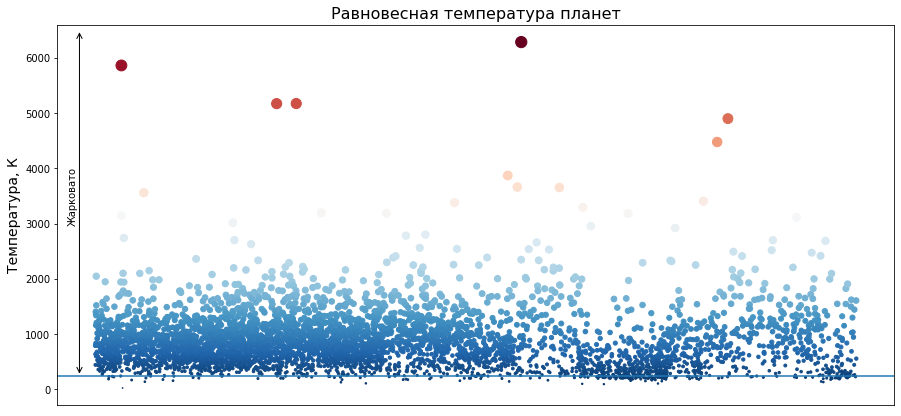

In [182]:
# график равновесной температуры планет
temp = data['teq']
x = temp.index
y = temp.values
N = len(temp)
color = sns.color_palette('RdBu', N)

plt.scatter(x, y, s=y/50, c=y, cmap="RdBu_r")
plt.axhline(y=249)
plt.title('Равновесная температура планет')
plt.ylabel('Температура, К')
plt.annotate('', xy=(-200, 6500), fontsize=13,
             xytext=(-200, 249), arrowprops=dict(facecolor='#FF6E40', arrowstyle='<->'))
plt.xticks([])
plt.text(-350, 3000, 'Жарковато', rotation='vertical');

Для начала отберем планеты, которые находятся в радиусе обитаемости у звезд. Добавим +- 5% к среднему радиусу обитаемости (у Земли афелий и перигелий отличаются примерно на 5%). Этот же маневр отсечет слишком холодные и слишком горячие планеты.

In [183]:
# функции для расчета верхней и нижней границы обитаемой зоны
def border_min(x):
    num_min = x*(1-5/100)
    return num_min


def border_max(x):
    num_max = x*(1+5/100)
    return num_max

In [184]:
# добавим столбцы с границами
data['border_min'] = data.apply(lambda x: border_min(x.d_au), axis=1)
data['border_max'] = data.apply(lambda x: border_max(x.d_au), axis=1)

In [185]:
# отберем записи где средний радиус зоны обитаемости лежит внутри обитаемой зоны около каждой звезды
planets = data[(data['distance'] > data['border_min']) &
               (data['distance'] < data['border_max'])]

Отберем планеты по уровню инсоляции. В данных уровень инсоляции указан относительного Земного уровня, поэтому нам нужно рассчитать уровень радиации Земли в перигелии и афелии Земли зная, что средняя инсоляция равна 1355 кВтч/м². 

Солнечная радиация уменьшается пропорционально квадрату расстояния между планетой и звездой, то есть при увеличении расстояния вдвое количество радиации, поступающее от звезды на планету, уменьшается вчетверо.

Получается в афелии уровень солнечной радиации будет равен 1789 кВтч/м², а в перигелии 1307 кВтч/м². При переводе в единицы относительно земного уровня это от 0.963 до 1.32

Отберем планеты, удовлетворяющие такому условию.

In [186]:
earth_2 = planets[(planets['insol'] > 0.963) & (planets['insol'] < 1.320)]
earth_2

,name,kepler_name,disposition,pdisposition,score,period,time0bk,impact,duration,depth,prad,teq,insol,snr,steff,slogg,d_au,distance,border_min,border_max
667,K01361.01,Kepler-61 b,CONFIRMED,CANDIDATE,0.998,59.878026,151.18470,0.0040,4.8027,1419.1,2.19,273.0,1.31,51.8,4016.0,4.658,0.289174,0.299674,0.274715,0.303632
1676,K02102.01,Kepler-1097 b,CONFIRMED,CANDIDATE,0.996,187.746606,157.35064,0.0150,5.8850,1583.0,2.95,267.0,1.20,20.2,5303.0,4.550,0.633844,0.641977,0.602152,0.665536
2624,K02757.01,Kepler-1690 b,CONFIRMED,CANDIDATE,0.998,234.635652,172.64615,0.0250,6.9650,868.5,2.56,267.0,1.20,26.7,5422.0,4.481,0.778765,0.744848,0.739827,0.817704
3474,K00701.03,Kepler-62 e,CONFIRMED,CANDIDATE,0.994,122.385868,150.41158,0.1010,7.1230,711.1,1.72,269.0,1.24,46.3,4926.0,4.653,0.480830,0.482643,0.456788,0.504871
3759,K04103.01,Kepler-1552 b,CONFIRMED,CANDIDATE,0.999,184.772710,217.35730,0.0400,9.5680,951.4,2.41,268.0,1.21,21.0,5273.0,4.566,0.666642,0.635180,0.633309,0.699974
4044,K04247.01,NaN,CANDIDATE,CANDIDATE,NaN,349.410470,241.46850,0.2791,15.0200,652.8,2.41,253.0,0.97,17.7,5878.0,4.512,0.977317,0.971319,0.928451,1.026182
4196,K04550.01,Kepler-1653 b,CONFIRMED,CANDIDATE,0.934,140.251943,175.13700,0.3230,6.5760,567.7,1.84,271.0,1.28,11.9,4821.0,4.529,0.548207,0.528539,0.520797,0.575618
4547,K07703.01,NaN,CANDIDATE,CANDIDATE,0.255,413.518560,374.35870,0.0190,10.3950,391.1,1.96,254.0,0.98,7.9,6031.0,4.450,1.080027,1.086763,1.026026,1.134028
4733,K04878.01,NaN,CANDIDATE,CANDIDATE,NaN,449.014990,144.70700,0.2182,12.5800,94.2,1.04,258.0,1.04,8.5,6031.0,4.368,1.162771,1.148097,1.104633,1.220910
5087,K01830.02,Kepler-967 c,CONFIRMED,CANDIDATE,1.000,198.710625,156.51819,0.0260,8.6380,2094.8,3.56,258.0,1.05,62.1,5180.0,4.548,0.642531,0.666733,0.610404,0.674657


У нас нашлись такие планеты!

**Итого, мы нашли такие планеты, которые:**
- лежат не слишком далеко и не слишком близко к своей звезде и вода может находиться там в жидкой фазе 
- равновесная температура которых близка к Земной
- уровень солнечной радиации лежит между максимальным и минимальным Земным значением 

Рассмотрим их чуть ближе по параметрам:
- период вращения вокруг своей звезды  ( _period_ )
- наличие других планет в системе ( _name_ )

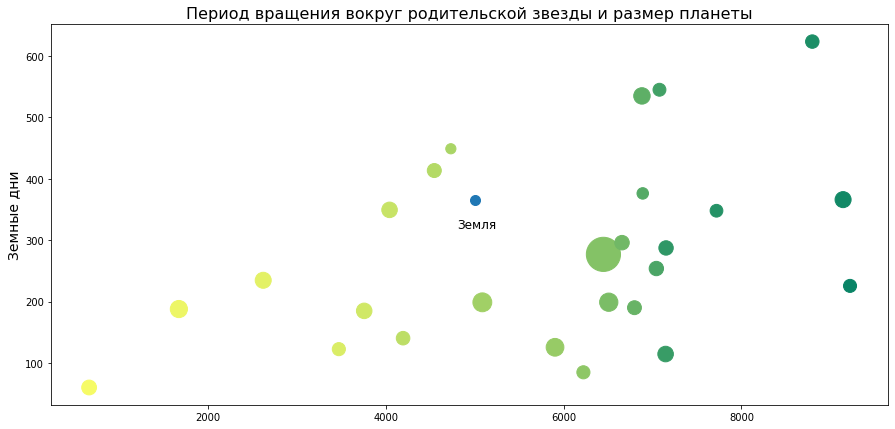

In [187]:
# размер точки зависит от размера планеты
year = earth_2[['period', 'kepler_name', 'prad']]
x = year.index
y = year['period']
N = len(year)
colors = sns.color_palette('summer_r', N)

plt.scatter(x, y, s=year['prad']*100, c=colors)
plt.title('Период вращения вокруг родительской звезды и размер планеты')
plt.ylabel('Земные дни')
plt.scatter(5000, 365, s=100)
plt.text(4800, 320, 'Земля', fontsize=12);

Количесво соседей у подходящих нам планет 

In [188]:
pl = pd.Series([int(i.split('.')[1]) for i in earth_2['name']]) \
                            .value_counts().reset_index().rename(columns={0:"amount"})
pl

,index,amount
0,1,24
1,3,1
2,2,1


Text(0, 0.5, '')

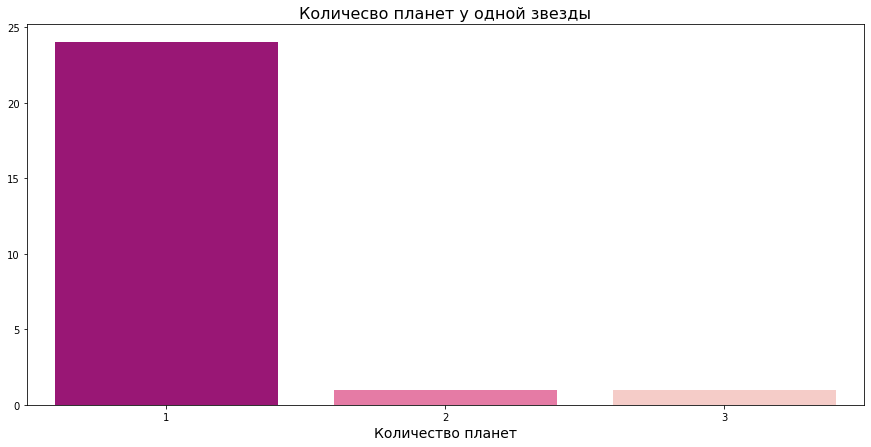

In [189]:
sns.barplot(x='index', y='amount', data=pl, palette='RdPu_r')
plt.title('Количесво планет у одной звезды')
plt.xlabel('Количество планет')
plt.ylabel('')

Среди объектов (более 9 000), которые обнаружил Кеплер почти за 4 года работы на орбите, есть планеты, которые находятся в так называемой «зоне Златовласки» , где условия похожи на Земные, вода может быть жидкой и приемлемый уровень солнечной радиации и в таких системах чаще одна планета. Таких планет всего 0.27% от общего количества наблюдений.  

Список планет постепенно уточнятся по мере анализа данных, которые собрал телескоп.

После Кеплера работу по поиску экзопланет продолжил телескоп TESS (миссия стартовала 11 июля 2018 года), основная цель миссии состоит в нахождении каменистых экзопланет, попадающих в обитаемую зону и удалённых от Земли не более чем на 200 световых лет. В июле 2020 года была завершена основная миссия телескопа, расширенная миссия телескопа с августа 2020 по сентябрь 2022.